In [1]:
from pathlib import Path
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import utils

In [29]:
df = utils.load_cop_data()
df = df.sort_values(["participant","genre", "song", ])
df = df.reset_index(drop=True)
song_numbers = utils.load_song_numbers()
participant_numbers = utils.load_participant_numbers()
song_labels = utils.load_song_labels_for_figures()

## Smooth data

In [30]:
df['x_smooth'] = df['cop_x']
df['y_smooth'] = df['cop_y']
# df = df.astype(object)
n_frames = 21
for i, row in df.iterrows():
    cop_x = pd.DataFrame(row["cop_x"][0])
    cop_y = pd.DataFrame(row["cop_y"][0])
    x_smooth = cop_x.rolling(n_frames).mean().values.flatten()
    y_smooth = cop_y.rolling(n_frames).mean().values.flatten()
    df.loc[i, 'x_smooth'] = [x_smooth[n_frames-1:]]
    df.loc[i, 'y_smooth'] = [y_smooth[n_frames-1:]]
df.head()

,participant,song,genre,cop_x,cop_y,x_smooth,y_smooth
0,1,Bloodline,Heavy metal,"[[0.1189349889755249, 0.12480694055557251, 0.1...","[[-0.028675459325313568, -0.027246005833148956...","[[0.12348234192246482, 0.12110550595181328, 0....","[[-0.08567444545527299, -0.09441971805478845, ..."
1,1,GoIntoTheWater,Heavy metal,"[[-0.003453562967479229, -0.009510243311524391...","[[-0.0603785514831543, -0.07643565535545349, -...","[[-0.05000798515088502, -0.054460752489311356,...","[[-0.07536743155547551, -0.07716712745882216, ..."
2,1,Juju,Jazz,"[[0.08097628504037857, 0.0813104510307312, 0.0...","[[0.00620765658095479, 0.0026051977183669806, ...","[[0.0627864929958291, 0.058737944201788024, 0....","[[0.012367430062676292, 0.012562481672613927, ..."
3,1,SoWhat,Jazz,"[[0.009710974991321564, 0.010020876303315163, ...","[[-0.06650251150131226, -0.06371375918388367, ...","[[0.03107529186776706, 0.03313242608592624, 0....","[[-0.05482343282727968, -0.05383522045754251, ..."
4,1,BackInBlack,Rock,"[[-0.26532602310180664, -0.259488046169281, -0...","[[0.083261638879776, 0.08744806796312332, 0.06...","[[-0.41354646994954064, -0.4303353102434249, -...","[[0.08782379967825753, 0.08955401785316922, 0...."


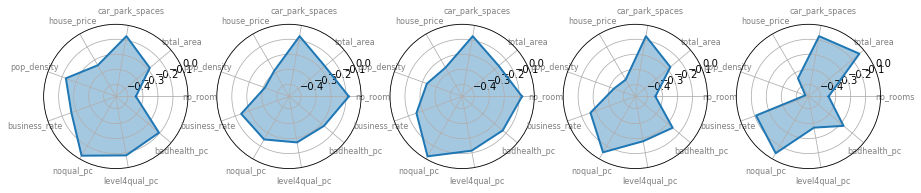

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd    

dic = {"no_rooms":{"0":-0.347,"1":-0.082,"2":-0.082, "3":-0.347,"4":-0.347},
       "total_area":{"0":-0.185,"1":-0.168,"2":-0.163, "3":-0.176,"4":-0.038},
       "car_park_spaces":{"0":-0.073,"1":-0.073,"2":-0.073, "3":-0.073,"4":-0.073},
       "house_price":{"0":-0.241,"1":-0.284,"2":-0.259,"3":-0.352,"4":-0.341},
       "pop_density":{"0":-0.127,"1":-0.310,"2":-0.231,"3":-0.329,"4":-0.459},
       "business_rate":{"0":-0.166,"1":-0.142,"2":-0.157,"3":-0.163,"4":-0.109},
       "noqual_pc":{"0":-0.025,"1":-0.15,"2":-0.020,"3":-0.051,"4":-0.044},
       "level4qual_pc":{"0":-0.082,"1":-0.17,"2":-0.114,"3":-0.178,"4":-0.270},
       "badhealth_pc":{"0":-0.105,"1":-0.176,"2":-0.128,"3":-0.156,"4":-0.176}}
df2 = pd.DataFrame.from_dict(dic)

fig, axes = plt.subplots(ncols=len(df2.index), subplot_kw=dict(polar=True), sharey=True,
                         figsize=(15,8))

for row, ax in enumerate(axes):
    categories = list(df2)
    N = len(categories)
    angles = np.arange(N+1)/N*2*np.pi

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='grey', size=8)
    ax.tick_params(labelleft=True)

    values = df2.iloc[row].values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha = .4)
    #      make_spider( row  = row, title='Cluster: ' + str(row), color=my_palette(row), ax=ax )

plt.show()
angles

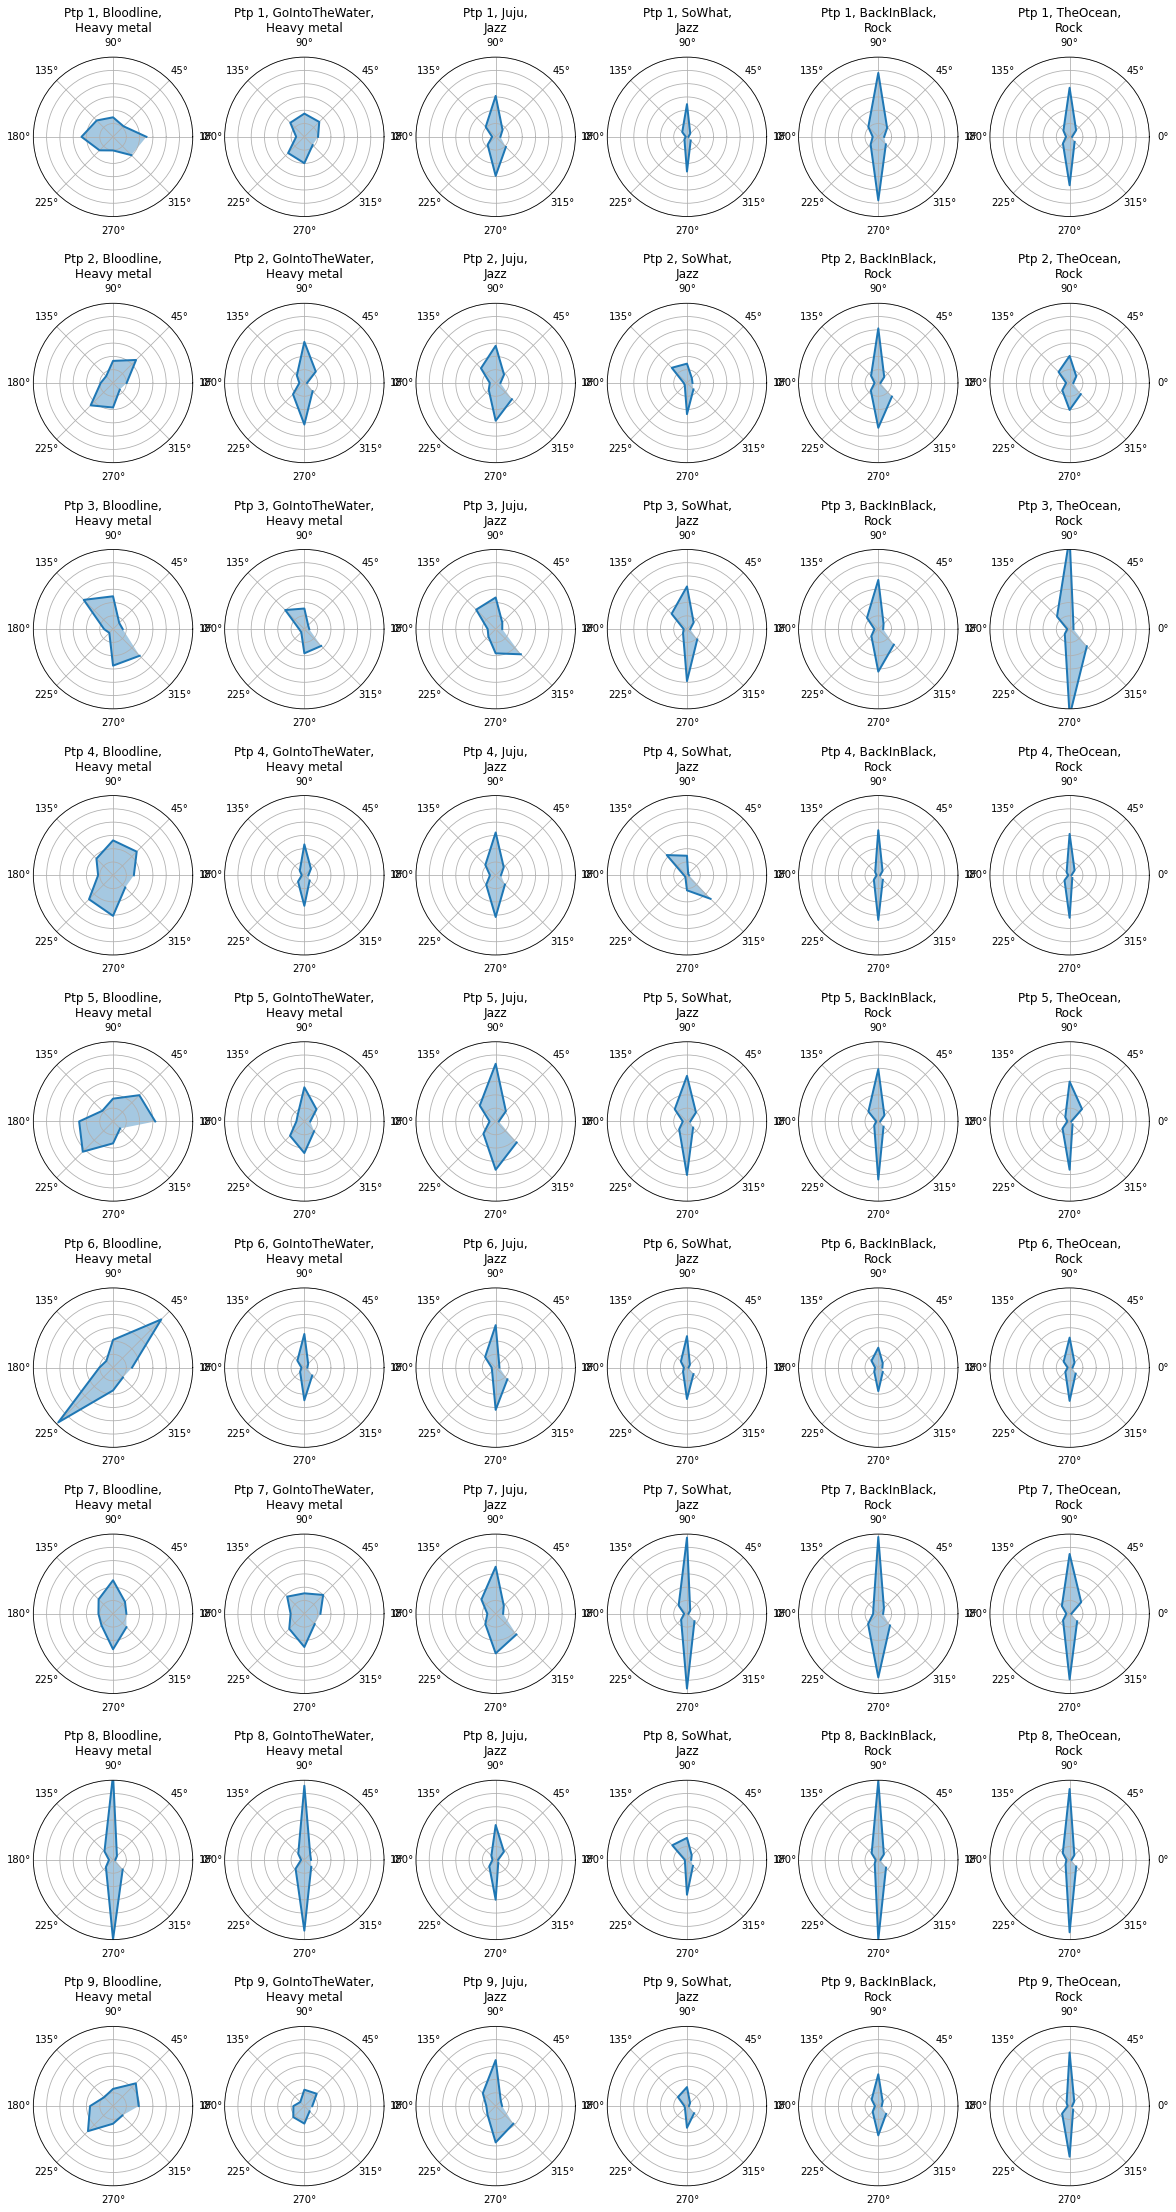

In [41]:
angle_names = [0, 45, 90, 135, 180, 225, 270, 315]
N = len(angle_names)
angle_vals = np.arange(N + 1) / N * 2 * np.pi
# angle_names = [0, 45, 90, 135, 180, ]
ANGLES = dict(zip(angle_names, angle_vals))

for angle in ANGLES.keys():
    df[angle] = 0
    
fig = plt.figure(figsize=(20,40))
interval = 30
df1 = df.iloc[0:6]
for ind, row in df.iterrows():
    x = row["x_smooth"][0] + np.abs(np.nanmin(row["x_smooth"][0]))
    y = row["y_smooth"][0] + np.abs(np.nanmin(row["y_smooth"][0]))
    i = -1
    
    for x_0, y_0 in zip(x[:-interval], y[:-interval]):
        i = i + 1
        x_n = x[i + interval]
        y_n = y[i + interval]
        angle = np.degrees(np.arctan2([x_n - x_0], [y_n - y_0])[0]) # x and y are backwards
        angle %= 360  # e.g., convert -90 to 270
        distance = np.sqrt( np.abs(y_n - y_0) ** 2 + np.abs(x_n - x_0) ** 2)
        a = np.append(np.array(list(ANGLES.keys())), 360)
        diffs = np.abs(a - angle)
        closest_angle = a[np.argmin(diffs)]
        if closest_angle == 360:
            closest_angle = 0
        df.loc[ind, closest_angle] = df.loc[ind, closest_angle] + distance
        
    
#     df.loc[ind, 360] = df.loc[ind, 0]
    ax = plt.subplot(9, 6, 1+ind, polar=True)
    angles = ANGLES.values()
    values = df.loc[ind, ANGLES.keys()].values
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha = .4)
    ax.set_title(f"Ptp {row.participant}, {row.song},\n{row.genre}")
    ax.set_ylim([0, 300])
    ax.set_yticklabels([])
        
#         snippet_x = x[i : i + interval]
#         snippet_y = y[i : i + interval]
#         fig, ax = plt.subplots(figsize=(3,3))
#         plt.scatter(snippet_y, snippet_x)
#         plt.plot([y_0, y_n], [x_0, x_n])
#         plt.title(angle)
#         ax.set_aspect('equal', adjustable='box')
        
    

In [35]:
values

array([233, 502, 1774, 562, 280, 543, 1871, 486], dtype=object)

In [40]:
for genre in ["Heavy metal", "Jazz", "Rock"]:
    

,participant,song,genre,cop_x,cop_y,x_smooth,y_smooth,0,45,90,135,180,225,270,315
0,1,Bloodline,Heavy metal,"[[0.1189349889755249, 0.12480694055557251, 0.1...","[[-0.028675459325313568, -0.027246005833148956...","[[0.12348234192246482, 0.12110550595181328, 0....","[[-0.08567444545527299, -0.09441971805478845, ...",125.649451,55.958359,73.370164,87.029384,118.707664,71.920822,51.265393,97.534894
1,1,GoIntoTheWater,Heavy metal,"[[-0.003453562967479229, -0.009510243311524391...","[[-0.0603785514831543, -0.07643565535545349, -...","[[-0.05000798515088502, -0.054460752489311356,...","[[-0.07536743155547551, -0.07716712745882216, ...",51.571394,79.279522,87.359793,74.878175,30.771001,86.366198,99.281028,43.992613
2,1,Juju,Jazz,"[[0.08097628504037857, 0.0813104510307312, 0.0...","[[0.00620765658095479, 0.0026051977183669806, ...","[[0.0627864929958291, 0.058737944201788024, 0....","[[0.012367430062676292, 0.012562481672613927, ...",17.824918,36.568549,153.969509,52.992168,13.348369,42.622586,146.845745,54.295180
3,1,SoWhat,Jazz,"[[0.009710974991321564, 0.010020876303315163, ...","[[-0.06650251150131226, -0.06371375918388367, ...","[[0.03107529186776706, 0.03313242608592624, 0....","[[-0.05482343282727968, -0.05383522045754251, ...",5.606246,17.424507,122.917229,25.180700,4.797442,13.602117,130.594405,19.751057
4,1,BackInBlack,Rock,"[[-0.26532602310180664, -0.259488046169281, -0...","[[0.083261638879776, 0.08744806796312332, 0.06...","[[-0.41354646994954064, -0.4303353102434249, -...","[[0.08782379967825753, 0.08955401785316922, 0....",22.041034,47.071746,240.605347,53.122433,21.058683,40.774783,239.054126,40.230206
5,1,TheOcean,Rock,"[[-0.12205449491739273, -0.11852315813302994, ...","[[0.0896940752863884, 0.09128684550523758, 0.0...","[[-0.1579092787135215, -0.1619197882357098, -0...","[[0.07611278160696938, 0.07556445932104475, 0....",9.439462,34.628204,184.703307,32.904646,13.468630,35.584306,182.283503,26.644581
6,2,Bloodline,Heavy metal,"[[0.2772296667098999, 0.27321162819862366, 0.2...","[[-0.06836538016796112, -0.08467936515808105, ...","[[0.2373144058954148, 0.23079998365470342, 0.2...","[[-0.09898094442628678, -0.10206090020281929, ...",51.288969,122.467310,83.125547,36.412368,46.574705,119.109788,92.366413,35.698545
7,2,GoIntoTheWater,Heavy metal,"[[0.076823391020298, 0.07028593868017197, 0.05...","[[-0.025068355724215508, -0.03926362469792366,...","[[0.05418336041094292, 0.05083406902849674, 0....","[[-0.015847660578964723, -0.015445182077764045...",10.261355,60.816673,154.753381,39.920197,18.859914,60.385459,156.431199,43.918775
8,2,Juju,Jazz,"[[0.30011460185050964, 0.30128777027130127, 0....","[[0.06725866347551346, 0.06468961387872696, 0....","[[0.2949408377919878, 0.29284451547123136, 0.2...","[[0.0529066568151826, 0.05135599142383961, 0.0...",18.044185,44.569707,139.924224,78.283163,22.150043,36.836809,142.022937,86.543564
9,2,SoWhat,Jazz,"[[0.07682996988296509, 0.07986032217741013, 0....","[[0.11456618458032608, 0.11259300261735916, 0....","[[0.08165397495031357, 0.08190131932497025, 0....","[[0.1073634351293246, 0.10723417961881274, 0.1...",20.761183,25.820590,72.714604,80.885216,12.205606,11.805299,117.347579,34.285631


In [ ]:
# interval = 30

# df1 = df.iloc[:3]
# fig = plt.figure(figsize=(20,40))
# for ind, row in df.iterrows():
#     angles = []
#     distances = []
#     print(f"row {ind}", end = "\r")
#     i = -1
#     x = row["x_smooth"][0] + np.nanmin(row["x_smooth"][0])
#     y = row["y_smooth"][0] + np.nanmin(row["y_smooth"][0])
#     for x_0, y_0 in zip(x[:-interval], y[:-interval]):
#         i = i + 1
#         x_n = x[i + interval]
#         y_n = y[i + interval]
# #         slope = (y_n - y_0) / (x_n - x_0)
#         angle = np.rad2deg(np.arctan2([y_n - y_0], [x_n - x_0])[0])
#         distance = np.sqrt( np.abs(y_n - y_0) ** 2 + np.abs(x_n - x_0) ** 2)
#         angles.append(angle)
#         distances.append(distance)

#     angles = np.array(angles)
#     distances = np.array(distances)
#     binsize = 10
#     bins = np.arange(-180, 180, binsize)
#     data = dict()
#     for bin_ in bins:
#         inds = np.where(np.logical_and(angles>=bin_, angles<bin_+binsize))
#         weighted_count = len(inds) * sum(distances[inds])
#         data[bin_] = weighted_count
    
#     ax = plt.subplot(9, 6, 1+ind, polar=True, ylim=(0, 100))
#     width = (2 * np.pi) / len(bins)
#     bars = ax.bar(data.keys(), data.values(), width=width*2, alpha=.3, )
#     ax.set_title(f"Ptp {row.participant}, {row.song}, {row.genre}")
#     ax.set_ylim([0, 160])
# plt.tight_layout()